<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [11]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-11-15 12:57:58--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv.2’

survey-data.csv.2   100%[===================>] 152.13M  60.7MB/s    in 2.5s    

2025-11-15 12:58:02 (60.7 MB/s) - ‘survey-data.csv.2’ saved [159525875/159525875]



**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [12]:
!pip install pandas 
!pip install matplotlib
!pip install seaborn

# Put this at top of notebook
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()  # use seaborn default style


**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [14]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [15]:
# Cell C: create sqlite and write table
import sqlite3

# create (or replace) the sqlite db file and write the DataFrame to table 'main'
conn = sqlite3.connect('survey-data.sqlite')
df.to_sql('main', conn, if_exists='replace', index=False)
conn.close()

# reconnect and show first 5 rows via SQL to verify
conn = sqlite3.connect('survey-data.sqlite')
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)
print(df_check.shape)
df_check.head()


(5, 114)


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,None,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,None,None,None,None
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,None,None
3,4,I am learning to code,18-24 years old,"Student, full-time",None,Apples,None,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,None,None
4,5,I am a developer by profession,18-24 years old,"Student, full-time",None,Apples,None,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,None,None


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [16]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [17]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [18]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [19]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [20]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


Current df columns: ['sql']
Current df shape:  (1, 1)


,sql
0,"CREATE TABLE ""main"" (\n""ResponseId"" INTEGER,\n..."



Columns in df_main:
 ['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStac

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,None,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,None,None,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN



Sample values in ConvertedCompYearly:


0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
8   NaN
9   NaN
Name: ConvertedCompYearly, dtype: float64

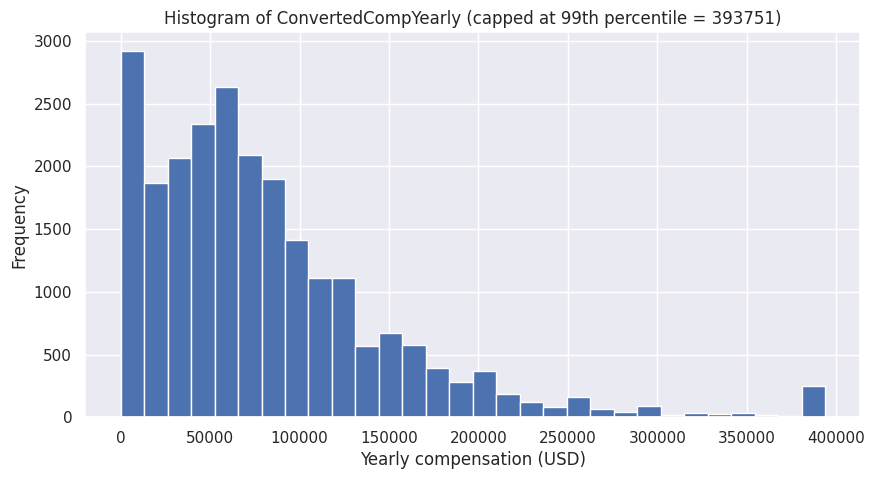

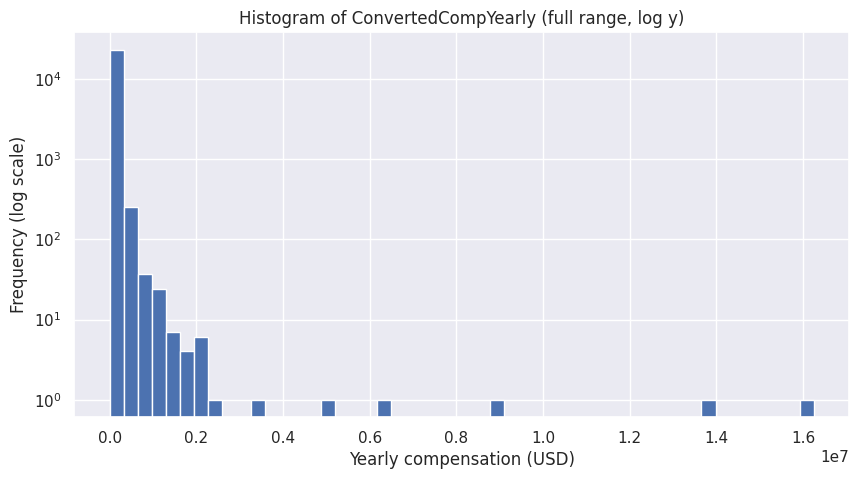

In [23]:
# 1) quick diagnostics: what is your current df?
print("Current df columns:", df.columns.tolist())
print("Current df shape: ", df.shape)
display(df.head(3))

# 2) load the SQLite table 'main' explicitly into a fresh dataframe (don't overwrite df)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# if conn is open from earlier, use it; otherwise reopen
try:
    conn
except NameError:
    import sqlite3
    conn = sqlite3.connect('survey-data.sqlite')

# read full table into df_main so we are sure we have the real table columns
df_main = pd.read_sql_query("SELECT * FROM main", conn)
print("\nColumns in df_main:\n", df_main.columns.tolist())
display(df_main.head(3))

# 3) make sure the column exists, then extract and clean it
col = 'ConvertedCompYearly'
if col not in df_main.columns:
    raise KeyError(f"Column {col!r} not found in table. Available cols: {df_main.columns.tolist()}")

comp = df_main[col]
print(f"\nSample values in {col}:")
display(comp.head(10))

# Clean: remove $ and commas and whitespace, coerce to numeric
comp_clean = (comp.astype(str)
                  .str.replace(r'[\$,]', '', regex=True)
                  .str.strip()
                  .replace({'nan':'', 'None':''})
             )
comp_num = pd.to_numeric(comp_clean, errors='coerce').dropna()

if comp_num.empty:
    raise ValueError(f"After cleaning, {col} contains no numeric values. Inspect sample above.")

# 4) plot histogram capped at 99th percentile and full-range with log y
cap = np.percentile(comp_num, 99)
comp_capped = comp_num.clip(upper=cap)

plt.figure(figsize=(10,5))
plt.hist(comp_capped, bins=30)
plt.title(f"Histogram of {col} (capped at 99th percentile = {int(cap)})")
plt.xlabel("Yearly compensation (USD)")
plt.ylabel("Frequency")
plt.show()

# Optional: full-range but log-scale on y
plt.figure(figsize=(10,5))
plt.hist(comp_num, bins=50)
plt.yscale('log')
plt.title(f"Histogram of {col} (full range, log y)")
plt.xlabel("Yearly compensation (USD)")
plt.ylabel("Frequency (log scale)")
plt.show()


**Box Plots**

Plot a box plot of Age.


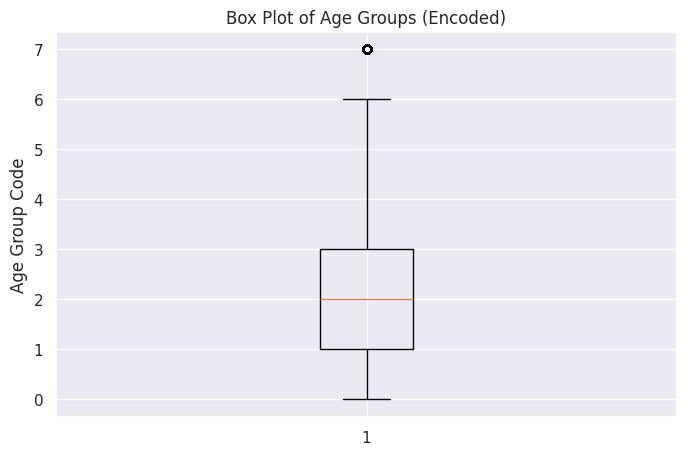

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Define age order
age_order = [
    "Under 18 years old",
    "18-24 years old",
    "25-34 years old",
    "35-44 years old",
    "45-54 years old",
    "55-64 years old",
    "65 years or older",
    "Prefer not to say"
]

# Encode age
df_main["Age_numeric"] = pd.Categorical(df_main["Age"], categories=age_order, ordered=True).codes

plt.figure(figsize=(8,5))
plt.boxplot(df_main["Age_numeric"].dropna())
plt.title("Box Plot of Age Groups (Encoded)")
plt.ylabel("Age Group Code")
plt.show()


### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


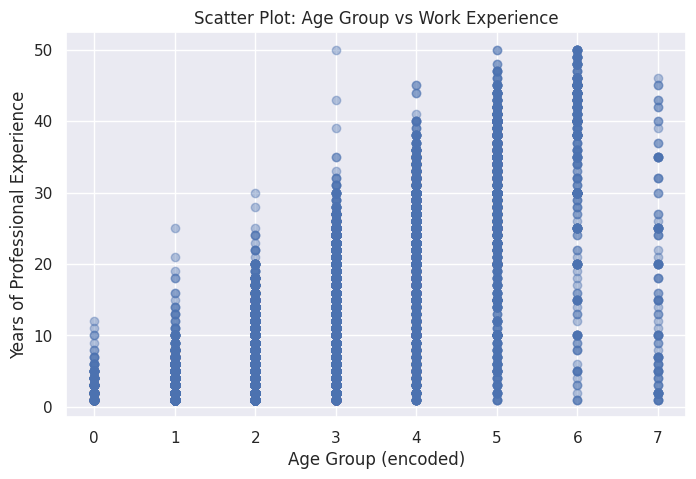

In [25]:
import matplotlib.pyplot as plt

# Clean WorkExp (YearsCodePro)
work = pd.to_numeric(df_main["YearsCodePro"], errors='coerce')

# Age numeric from earlier step
age_num = df_main["Age_numeric"]

scatter_df = pd.DataFrame({
    "Age": age_num,
    "WorkExp": work
}).dropna()

plt.figure(figsize=(8,5))
plt.scatter(scatter_df["Age"], scatter_df["WorkExp"], alpha=0.4)
plt.title("Scatter Plot: Age Group vs Work Experience")
plt.xlabel("Age Group (encoded)")
plt.ylabel("Years of Professional Experience")
plt.show()


**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


Saved bubble plot to: bubble_plot_timesearch_vs_timeanswer.png


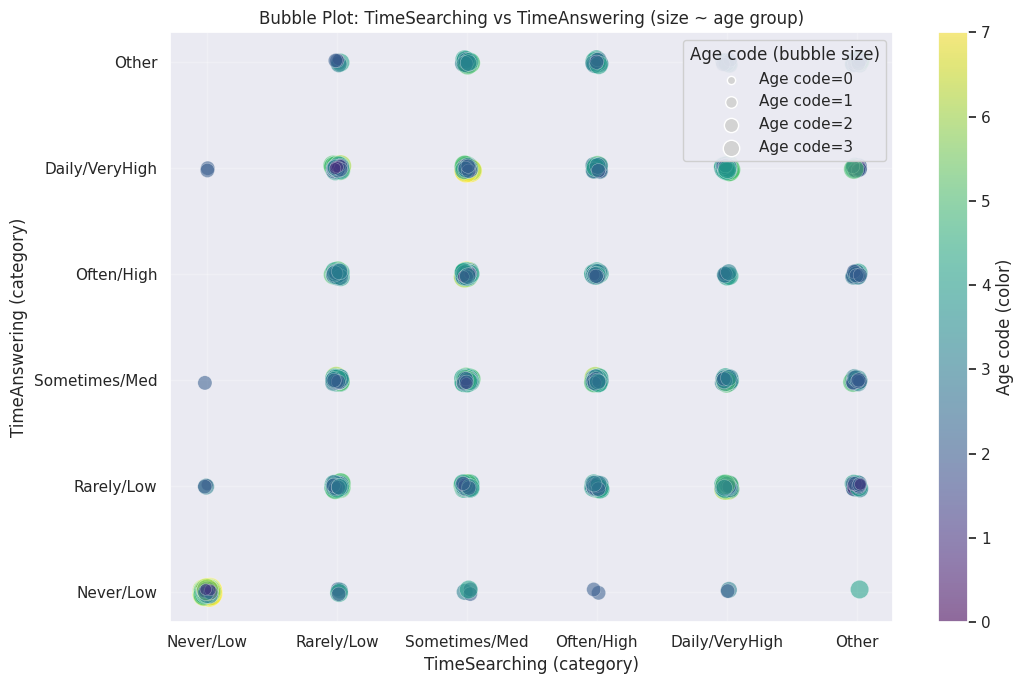

In [35]:
# FINAL CLEANED BUBBLE PLOT CELL
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Columns
xcol = "TimeSearching"
ycol = "TimeAnswering"
agecol = "Age"            # original age column
agecode = "Age_numeric"   # encoded age column we will use for sizes/colors

# Ensure df_main exists and contains data
assert 'df_main' in globals(), "df_main not found - load the SQL table into df_main first."

# --- helper: convert column to numeric (try numeric, then common mapping, then factorize) ---
def to_numeric_or_codes(series):
    s = series.fillna("").astype(str)
    # try numeric conversion
    num = pd.to_numeric(s, errors='coerce')
    if num.notna().sum() / max(1, len(s)) > 0.5:
        return num
    # common textual ordinal mappings (extend if your labels differ)
    mapping = {
        "Never":0, "Rarely":1, "Sometimes":2, "Often":3, "Daily":4,
        "Less than once a month":0, "Once a month":1,
        "Several times a month":2, "Several times a week":3, "Every day":4,
        "0":0, "1":1, "2":2, "3":3, "4":4, "5":5
    }
    mapped = s.map(mapping)
    if mapped.notna().sum() > 0:
        return mapped
    # fallback: factorize categories to integers
    cats = pd.Categorical(s)
    return pd.Series(cats.codes).replace(-1, np.nan)

# --- Ensure Age_numeric exists (ordered encoding of Age buckets) ---
if agecode not in df_main.columns:
    age_order = [
        "Under 18 years old","18-24 years old","25-34 years old",
        "35-44 years old","45-54 years old","55-64 years old",
        "65 years or older","Prefer not to say"
    ]
    df_main[agecode] = pd.Categorical(df_main.get(agecol, pd.Series(dtype=object)).astype(str),
                                      categories=age_order, ordered=True).codes

# Convert x, y, age to numeric arrays
x_vals = to_numeric_or_codes(df_main.get(xcol, pd.Series(dtype=object)))
y_vals = to_numeric_or_codes(df_main.get(ycol, pd.Series(dtype=object)))
age_vals = pd.to_numeric(df_main.get(agecode, pd.Series(dtype=float)), errors='coerce')

# Build working DataFrame and keep only rows with numeric x & y
plot_df = pd.DataFrame({xcol: x_vals, ycol: y_vals, agecode: age_vals})
plot_df[xcol] = pd.to_numeric(plot_df[xcol], errors='coerce')
plot_df[ycol] = pd.to_numeric(plot_df[ycol], errors='coerce')
plot_df[agecode] = pd.to_numeric(plot_df[agecode], errors='coerce')

plot_df = plot_df.dropna(subset=[xcol, ycol]).reset_index(drop=True)

# If empty, print diagnostics and exit
if plot_df.empty:
    print("No usable rows to plot after conversion. Top raw values (x and y) for mapping:")
    display(df_main.get(xcol, pd.Series(dtype=object)).astype(str).value_counts().head(40))
    display(df_main.get(ycol, pd.Series(dtype=object)).astype(str).value_counts().head(40))
else:
    # sample to at most N points for rendering performance
    N = 5000
    if len(plot_df) > N:
        plot_df = plot_df.sample(N, random_state=42).reset_index(drop=True)

    # jitter to reduce overplotting
    rng = np.random.RandomState(42)
    jitter_strength = 0.06
    plot_df["x_j"] = plot_df[xcol] + (rng.rand(len(plot_df)) - 0.5) * jitter_strength
    plot_df["y_j"] = plot_df[ycol] + (rng.rand(len(plot_df)) - 0.5) * jitter_strength

    # bubble sizes and color (based on age code)
    sizes = (plot_df[agecode].fillna(0).astype(float) + 1.0) * 35.0
    colors = plot_df[agecode].fillna(0).astype(float)

    # plotting
    fig, ax = plt.subplots(figsize=(11,7))
    sc = ax.scatter(plot_df["x_j"], plot_df["y_j"], s=sizes, c=colors, cmap="viridis", alpha=0.55,
                    edgecolors='w', linewidth=0.3)

    # Axis ticks: replace integer codes with readable labels (adjust mapping to your dataset if needed)
    label_map = {0:"Never/Low", 1:"Rarely/Low", 2:"Sometimes/Med", 3:"Often/High", 4:"Daily/VeryHigh", 5:"Other"}
    unique_x = sorted(plot_df[xcol].dropna().unique())
    unique_y = sorted(plot_df[ycol].dropna().unique())

    ax.set_xticks(unique_x)
    ax.set_xticklabels([label_map.get(int(v), str(int(v))) for v in unique_x], rotation=0)
    ax.set_yticks(unique_y)
    ax.set_yticklabels([label_map.get(int(v), str(int(v))) for v in unique_y])

    ax.set_xlabel("TimeSearching (category)")
    ax.set_ylabel("TimeAnswering (category)")
    ax.set_title("Bubble Plot: TimeSearching vs TimeAnswering (size ~ age group)")

    # colorbar and legend for sizes
    cbar = fig.colorbar(sc, ax=ax)
    cbar.set_label("Age code (color)")

    # added size legend (example markers)
    unique_age_codes = sorted(plot_df[agecode].dropna().unique())
    for code in unique_age_codes[:4]:
        ax.scatter([], [], s=(code+1)*35.0, color='lightgray', edgecolors='w', label=f"Age code={int(code)}")
    ax.legend(title="Age code (bubble size)", loc="upper right", framealpha=0.9)

    ax.grid(alpha=0.25)
    plt.tight_layout()

    # Save figure (high-res) and show
    outpath = "bubble_plot_timesearch_vs_timeanswer.png"
    plt.savefig(outpath, dpi=220, bbox_inches="tight")
    print(f"Saved bubble plot to: {outpath}")
    plt.show()


### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


Detected DB columns: ['DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired']
Using column: DatabaseHaveWorkedWith

Top 5 databases:
PostgreSQL              25536
MySQL                   21099
SQLite                  17365
Microsoft SQL Server    13275
MongoDB                 13007
Name: count, dtype: int64


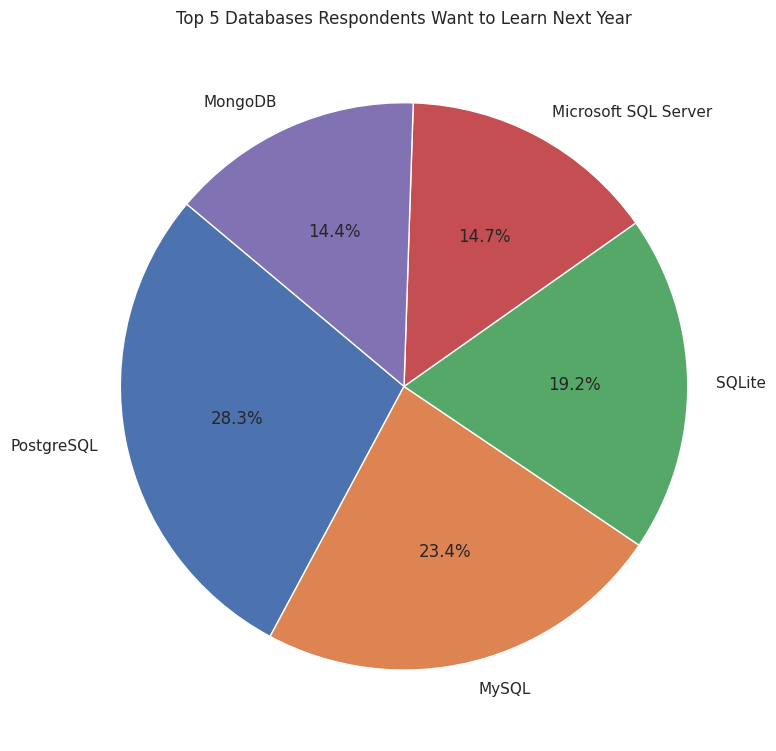

In [36]:
# FINAL CLEANED PIE CHART CELL
import pandas as pd
import matplotlib.pyplot as plt

# 1. Auto-detect column that contains the word "database"
candidates = [c for c in df_main.columns if "database" in c.lower() or "db" in c.lower()]
print("Detected DB columns:", candidates)

if len(candidates) == 0:
    raise ValueError("No database-related column found. Please print(df_main.columns) and tell me the correct name.")

db_col = candidates[0]   # use first match
print("Using column:", db_col)

# 2. Split multi-select entries (if any)
# Many StackOverflow columns have entries like:  "MySQL;PostgreSQL;SQLite"
db_series = df_main[db_col].dropna().astype(str).str.split(';')

# 3. Flatten into a single list
all_dbs = [db.strip() for sublist in db_series for db in sublist if db.strip() != ""]

# 4. Count frequencies
db_counts = pd.Series(all_dbs).value_counts()

# 5. Select top 5
top5 = db_counts.head(5)
print("\nTop 5 databases:")
print(top5)

# 6. Pie Chart
plt.figure(figsize=(8,8))
plt.pie(
    top5.values,
    labels=top5.index,
    autopct="%1.1f%%",
    startangle=140,
    wedgeprops={"edgecolor": "white", "linewidth": 1}
)
plt.title("Top 5 Databases Respondents Want to Learn Next Year")
plt.tight_layout()
plt.show()


**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


Rows for age group 25–34: 23911

Median TimeSearching: 1.0
Median TimeAnswering: 1.0


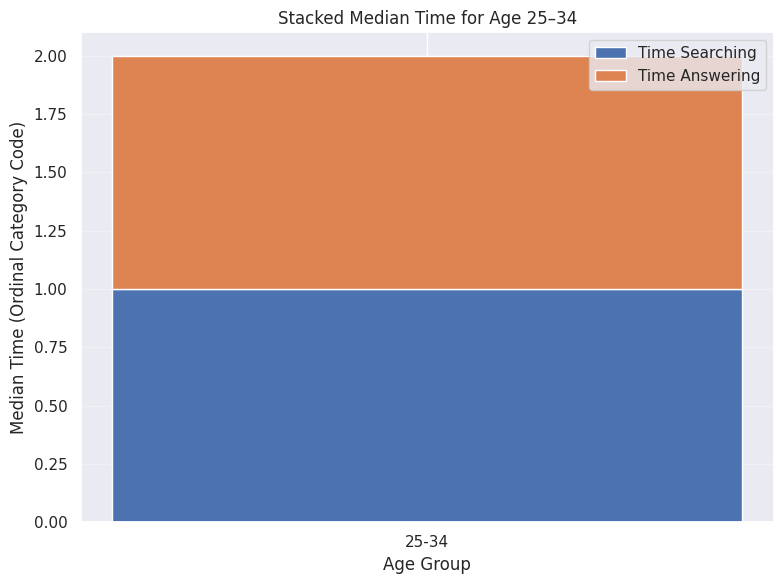

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

age_col = "Age"
ts_col = "TimeSearching"
ta_col = "TimeAnswering"

for col in [age_col, ts_col, ta_col]:
    if col not in df_main.columns:
        raise ValueError(f"Column '{col}' not found in df_main. Please print(df_main.columns).")

age_target = "25-34 years old"

df_25_34 = df_main[df_main[age_col].astype(str).str.strip() == age_target].copy()

if df_25_34.empty:
    raise ValueError("No rows found for age group 25–34. Run df_main['Age'].unique() to confirm values.")

print("Rows for age group 25–34:", len(df_25_34))


def convert_to_numeric(series):
    s = series.fillna("").astype(str)

    # Try numeric directly
    numeric = pd.to_numeric(s, errors="ignore")
    if numeric.dtype != object:
        return pd.to_numeric(s, errors="coerce")

    mapping = {
        "Never": 0, "Rarely": 1, "Sometimes": 2, "Often": 3, "Daily": 4,
        "Less than once a month": 0,
        "Once a month": 1,
        "Several times a month": 2,
        "Several times a week": 3,
        "Every day": 4,
        "0": 0, "1": 1, "2": 2, "3": 3, "4": 4, "5": 5,
    }

    mapped = s.map(mapping)
    if mapped.notna().sum() > 0:
        return mapped

    return pd.Series(pd.Categorical(s).codes).replace(-1, np.nan)

df_25_34["TS_num"] = convert_to_numeric(df_25_34[ts_col])
df_25_34["TA_num"] = convert_to_numeric(df_25_34[ta_col])

median_ts = df_25_34["TS_num"].median()
median_ta = df_25_34["TA_num"].median()

print("\nMedian TimeSearching:", median_ts)
print("Median TimeAnswering:", median_ta)

plt.figure(figsize=(8,6))

plt.bar("25-34", median_ts, label="Time Searching")
plt.bar("25-34", median_ta, bottom=median_ts, label="Time Answering")

plt.title("Stacked Median Time for Age 25–34")
plt.ylabel("Median Time (Ordinal Category Code)")
plt.xlabel("Age Group")
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


Using compensation column: CompTotal

Median compensation per age group:
Age
45-54 years old    130000.0
55-64 years old    135000.0
Name: Comp_num, dtype: float64


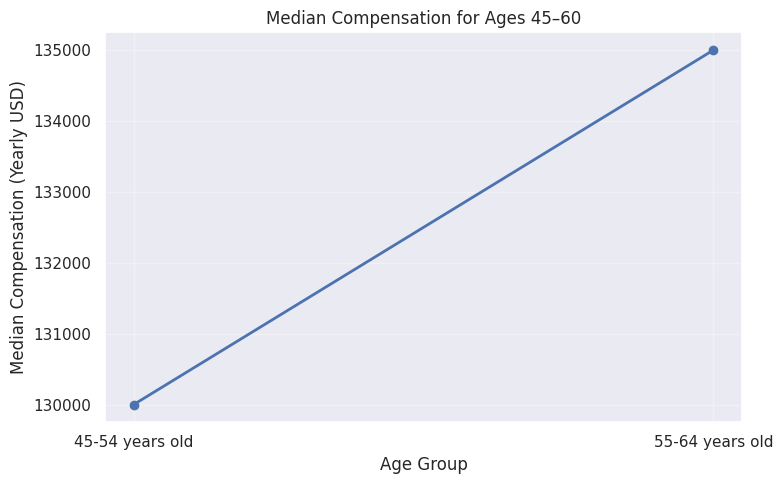

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

comp_candidates = [c for c in df_main.columns if "comp" in c.lower()]
if len(comp_candidates) == 0:
    raise ValueError("No compensation column found. Please print(df_main.columns).")
comp_col = comp_candidates[0]
print("Using compensation column:", comp_col)

comp_clean = (
    df_main[comp_col]
    .astype(str)
    .str.replace(r"[\$,]", "", regex=True)
)
df_main["Comp_num"] = pd.to_numeric(comp_clean, errors="coerce")
\
target_ages = ["45-54 years old", "55-64 years old"]

df_line = df_main[df_main["Age"].astype(str).isin(target_ages)].copy()

medians = df_line.groupby("Age")["Comp_num"].median().dropna()

print("\nMedian compensation per age group:")
print(medians)

plt.figure(figsize=(8,5))
plt.plot(medians.index, medians.values, marker="o", linewidth=2)
plt.title("Median Compensation for Ages 45–60")
plt.xlabel("Age Group")
plt.ylabel("Median Compensation (Yearly USD)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.



MainBranch response counts:
MainBranch
I used to be a developer by profession, but no longer am                                  1510
I code primarily as a hobby                                                               3334
I am learning to code                                                                     3875
I am not primarily a developer, but I write code sometimes as part of my work/studies     6511
I am a developer by profession                                                           50207
Name: count, dtype: int64


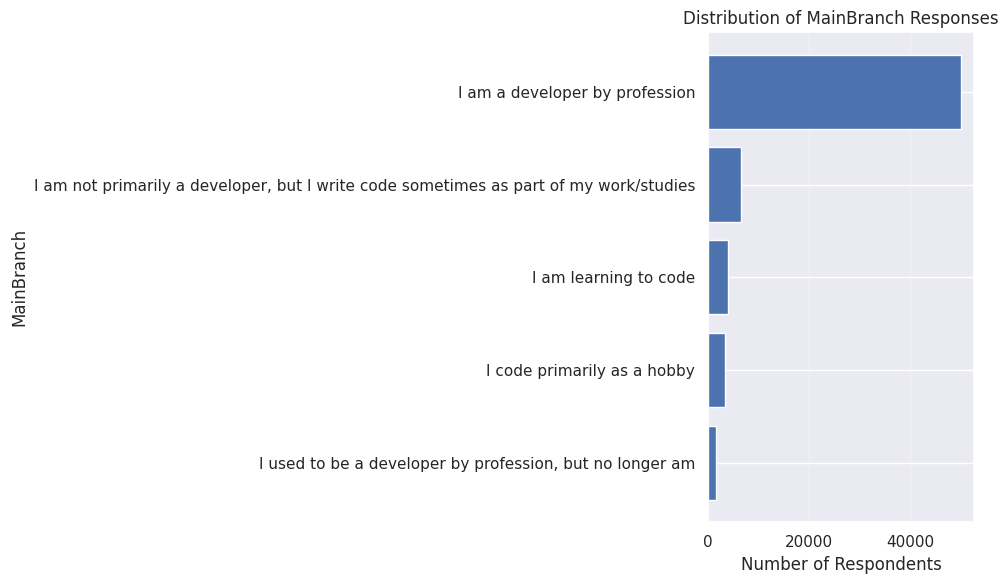

In [39]:

import pandas as pd
import matplotlib.pyplot as plt

if "MainBranch" not in df_main.columns:
    raise ValueError("MainBranch column not found.")

branch_counts = df_main["MainBranch"].astype(str).value_counts().sort_values()

print("\nMainBranch response counts:")
print(branch_counts)

plt.figure(figsize=(10,6))
plt.barh(branch_counts.index, branch_counts.values)
plt.title("Distribution of MainBranch Responses")
plt.xlabel("Number of Respondents")
plt.ylabel("MainBranch")
plt.grid(axis="x", alpha=0.3)
plt.tight_layout()
plt.show()


### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [ ]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
